In [5]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# Charger le fichier JSON
file_path = 'cleaned_articles_fr.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df = pd.DataFrame(data)
df

,title,description,content,lemmatized_text,diseases,vaccines,treatments
0,demarrage lepidemie bronchiolite metropole lil...,enfants ans vus urgences atteints dune bronchi...,lepidemie annuelle bronchiolite maladie danger...,demarrage lepidemie bronchiolite metropole lil...,[],[],[]
1,coronavirus conditions indemniser maladie prof...,cour constitutionnelle invalide jeudi conditio...,maisons repos retenu lecons covid choses quon ...,coronavirus condition indemniser maladie profe...,[],[],[]
2,doute mort reboot film blade,disney marvel repousse reboot film blade date ...,disney marvel repousse reboot film blade date ...,doute mourir reboot film blade disney marvel r...,[],[],[]
3,donald trump role veut donner kennedy jr cas v...,donald trump promet donner robert kennedy jr p...,etatsunis promesse inquietante scrutin novembr...,donald trump rol vouloir donner kennedy jr cas...,[],[],[]
4,retard er vol commercial dariane malheureuse l...,vol inaugural dariane survenu lete fin lannee ...,vol inaugural dariane survenu lete fin lannee ...,retard er vol commercial dariane malheureux la...,[],[],[]
...,...,...,...,...,...,...,...
58,academie francaise definitions fausses fellati...,mercredi lacademie francaise sorti neuvieme di...,mercredi lacademie francaise devoile neuvieme ...,academie francais definition faux fellation cu...,[],[],[]
59,aligner jours carence fonction publique prive ...,aligner delai carence public prive mesure levi...,aligner delai carence public prive propose gou...,aligner jour carencer fonction public prive me...,[],[],[]
60,robert kennedy jr tete sante americaine nouvel...,donald trump annonce quil donnerait carte blan...,robert kennedy jr aider lamerique bonne sante ...,robert kennedy jr tete sante americaine nouvea...,[],[],[]
61,enjeux critiques planete reelection donald tru...,environnement technologie sante geopolitique d...,environnement technologie sante geopolitique d...,enjeux critique planete reelection donald trum...,[],[],[]


## Cleaned_articles (Anglais)

In [4]:
# Charger le fichier JSON
file_path = 'cleaned_articles_en.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df_en = pd.DataFrame(data)
df_en

,title,description,content,lemmatized_text,diseases,vaccines,treatments
0,trio charged suspected international ppe fraud,trio includ husband wife charged national crim...,people includ husband wife appeared court char...,trio charge suspect international ppe fraud tr...,[],[],[]
1,coronavirus defeats innate immune response,sarscov enzyme counteract cells innate defense...,coronavirus sarscov enzyme counteract cells in...,coronavirus defeat innate immune response sars...,[],[],[]
2,people liv pain covid emerged,chronic pain increased adults rise sedentary l...,covid restrictions helped stem sarscov consequ...,people liv pain covid emerge chronic pain incr...,[],[],[]
3,watch terrify moment dog walker narrowly avoid...,bystander footage captured terrify moment clif...,russia texas school shoot abortion rights amer...,watch terrify moment dog walker narrowly avoid...,[],[],[]
4,watch father flies country paint mural grandchild,mark hendron traveled delaware california epic...,russia texas school shoot abortion rights amer...,watch father fly country paint mural grandchil...,[],[],[]
...,...,...,...,...,...,...,...
95,remdesivir papers faucis covid drug choice kil...,military whistleblower dropped socalled remdes...,military whistleblower dropped socalled remdes...,remdesivir paper faucis covid drug choice kill...,[],[],[]
96,dmso ivermectinlike miracle solution strokes n...,miracle remedy light independent media referr ...,miracle remedy light independent media referr ...,dmso ivermectinlike miracle solution stroke ne...,[],[],[]
97,white house legalizes gainoffunction build bio...,regime joe biden kamala harris revealed illega...,regime joe biden kamala harris revealed illega...,white house legalize gainoffunction build biow...,[],[],[]
98,san francisco transit workers fired refusing c...,employees san francisco bay rapid transit bart...,employees san francisco bay rapid transit bart...,san francisco transit worker fire refuse covid...,[],[],[]


## Cleaned_articles  (Arabic)

In [7]:
# Charger le fichier JSON
file_path = 'cleaned_articles_ar.json'  # Remplacez par le chemin vers votre fichier JSON
with open(os.path.join("../data/cleaned",file_path), 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df_ar = pd.DataFrame(data)
df_ar

,title,description,content,lemmatized_text,diseases,vaccines,treatments
0,منهم لاعبة اصل مغربي يجني محترفو العاب الفيديو...,ادت جايحة فيروس كورونا تسريع عالم العاب الفيدي...,league of legends pewdiepie ninja shroud xqc s...,,[],[],[]
1,تدابير مهمة لامان الدفع بالهاتف الذكي,شهدت السنوات وخاصة جايحة كورونا زيادة ملحوظة ا...,tan bluetooth nfc wifi sim,,[],[],[]
2,محكمة تقر دولار لموظفة فصلت لرفضها لقاح كورونا,قررت منح هيية محلفين فيدرالية امريكية منح دولا...,httpssarabicaehtml httpscdnimgsarabicaeimgefxd...,,[],[],[]
3,المدن الكبرى الكندية تشهد انخفاضا اسعار الايجا...,الاهرام الكندي تورنتو نشرت rentalsca تقريرها ن...,rentalsca rentalsca,,[],[],[]


In [3]:
df.describe

<bound method NDFrame.describe of                                                 title  \
0   dmarrage lpidmie bronchiolite mtropole liledef...   
1   coronavirus conditions indemniser maladie prof...   
2                   cest doute mort reboot film blade   
3   donald trump rle veut donner kennedy jr cas vi...   
4   retard er vol commercial dariane malheureuse l...   
..                                                ...   
58  acadmie franaise dfinitions fausses fellation ...   
59  aligner jours carence fonction publique priv m...   
60  robert kennedy jr tte sant amricaine nouvelle ...   
61  enjeux critiques plante aprs rlection donald t...   
62  dealers femmes voiles accuss casseurs lusage m...   

                                          description  \
0   enfants ans vus urgences atteints dune bronchi...   
1   cour constitutionnelle invalid jeudi condition...   
2   disney marvel repouss reboot film blade date i...   
3   donald trump promet donner robert kennedy jr p...

In [8]:
df_en.describe

<bound method NDFrame.describe of                                                 title  \
0      trio charged suspected international ppe fraud   
1          coronavirus defeats innate immune response   
2                       people liv pain covid emerged   
3   watch terrify moment dog walker narrowly avoid...   
4   watch father flies country paint mural grandchild   
..                                                ...   
95  remdesivir papers faucis covid drug choice kil...   
96  dmso ivermectinlike miracle solution strokes n...   
97  white house legalizes gainoffunction build bio...   
98  san francisco transit workers fired refusing c...   
99  idaho health board defies government edicts re...   

                                          description  \
0   trio includ husband wife charged national crim...   
1   sarscov enzyme counteract cells innate defense...   
2   chronic pain increased adults rise sedentary l...   
3   bystander footage captured terrify moment clif...

In [9]:
df_ar.describe

<bound method NDFrame.describe of                                                title  \
0  منهم لاعبة اصل مغربي يجني محترفو العاب الفيديو...   
1              تدابير مهمة لامان الدفع بالهاتف الذكي   
2     محكمة تقر دولار لموظفة فصلت لرفضها لقاح كورونا   
3  المدن الكبرى الكندية تشهد انخفاضا اسعار الايجا...   

                                         description  \
0  ادت جايحة فيروس كورونا تسريع عالم العاب الفيدي...   
1  شهدت السنوات وخاصة جايحة كورونا زيادة ملحوظة ا...   
2  قررت منح هيية محلفين فيدرالية امريكية منح دولا...   
3  الاهرام الكندي تورنتو نشرت rentalsca تقريرها ن...   

                                             content  \
0  league of legends pewdiepie ninja shroud xqc s...   
1                         tan bluetooth nfc wifi sim   
2  httpssarabicaehtml httpscdnimgsarabicaeimgefxd...   
3                                rentalsca rentalsca   

                              lemmatized_text diseases vaccines treatments  
0                                             

## Histogramme de Longeur des titres (Frensh)

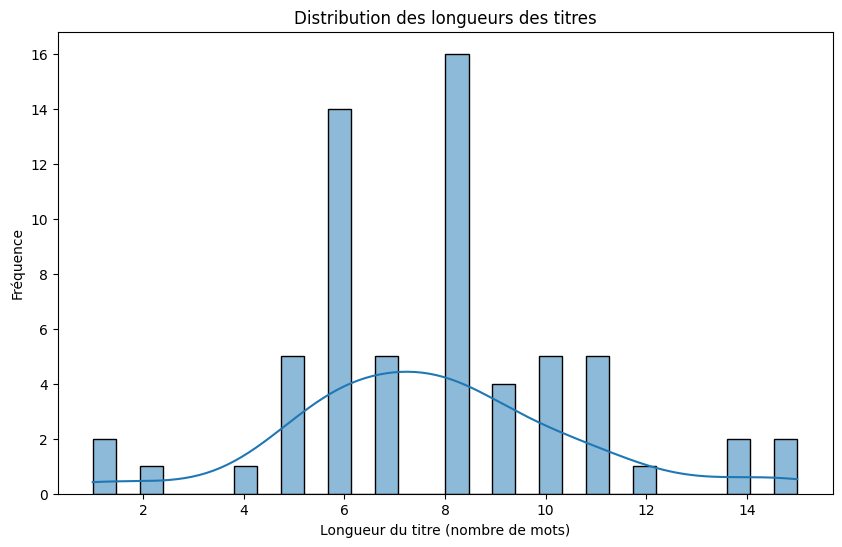

In [4]:
# Calcul de la longueur des titres
df['title_length'] = df['title'].apply(lambda x: len(x.split()))

# Histogramme de la longueur des titres
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], kde=True, bins=30)
plt.title("Distribution des longueurs des titres")
plt.xlabel("Longueur du titre (nombre de mots)")
plt.ylabel("Fréquence")
plt.show()

## Histogramme de Longeur des titres (Anglais)

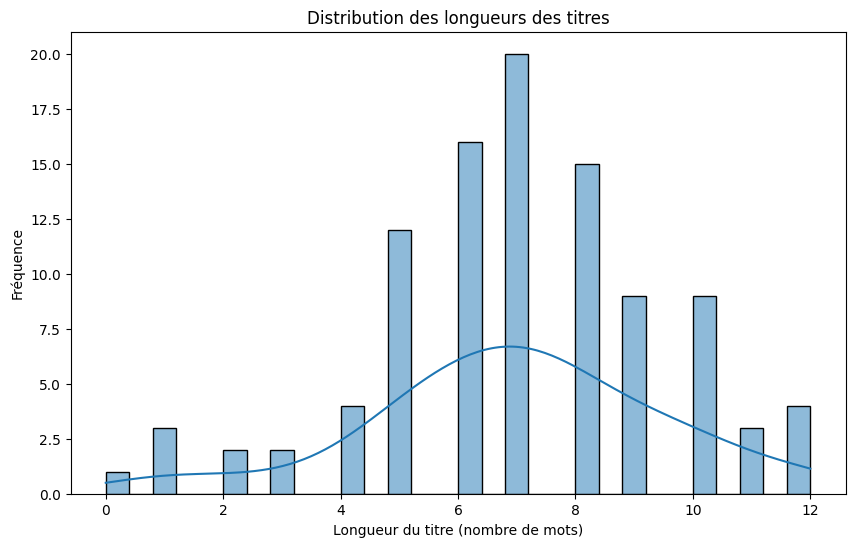

In [10]:
# Calcul de la longueur des titres
df_en['title_length'] = df_en['title'].apply(lambda x: len(x.split()))

# Histogramme de la longueur des titres
plt.figure(figsize=(10, 6))
sns.histplot(df_en['title_length'], kde=True, bins=30)
plt.title("Distribution des longueurs des titres")
plt.xlabel("Longueur du titre (nombre de mots)")
plt.ylabel("Fréquence")
plt.show()

## Histogramme de Longeur des titres (Arabic)

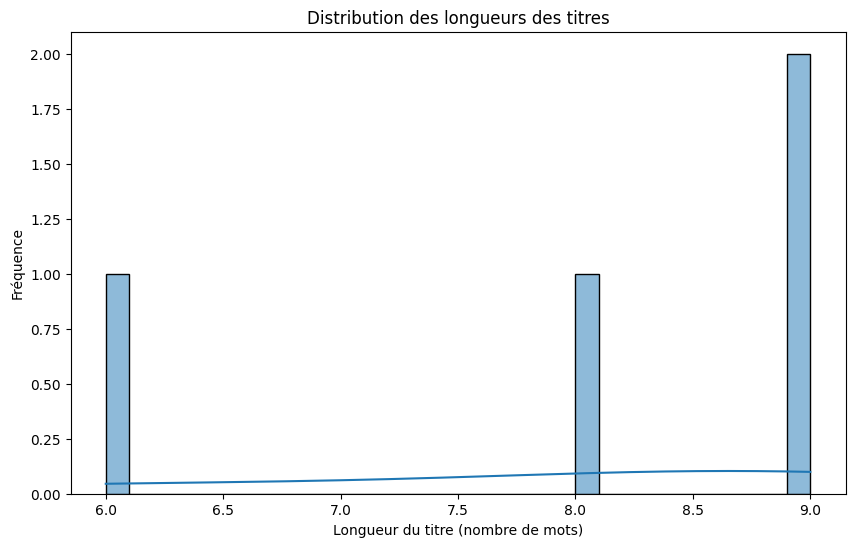

In [11]:
# Calcul de la longueur des titres
df_ar['title_length'] = df_ar['title'].apply(lambda x: len(x.split()))

# Histogramme de la longueur des titres
plt.figure(figsize=(10, 6))
sns.histplot(df_ar['title_length'], kde=True, bins=30)
plt.title("Distribution des longueurs des titres")
plt.xlabel("Longueur du titre (nombre de mots)")
plt.ylabel("Fréquence")
plt.show()

## Analyse des mots  (FRENSH)

In [5]:
# Analyser la fréquence des termes dans les titres
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 mots fréquents
X = vectorizer.fit_transform(df['title'])

# Afficher les mots les plus fréquents
frequent_terms = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(frequent_terms.sum().sort_values(ascending=False).head(20))

trump            9
donald           8
premire          5
contact          4
monde            4
vaccin           4
lantwerp         4
cest             3
covid            3
complotistes     3
franaise         3
dune             3
poutine          3
jr               3
faillite         3
prsidentielle    3
rappels          3
prts             3
sant             3
retourne         3
dtype: int64


## Analyse des mots  (ANGLAIS)

In [12]:
# Analyser la fréquence des termes dans les titres
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 mots fréquents
X = vectorizer.fit_transform(df_en['title'])

# Afficher les mots les plus fréquents
frequent_terms = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(frequent_terms.sum().sort_values(ascending=False).head(20))

watch         30
covid         18
trump          9
government     6
vaccines       6
harris         5
halloween      5
health         4
injections     4
house          4
dog            4
dr             4
win            4
vaccine        4
rfk            4
birx           3
city           3
build          3
nation         3
york           3
dtype: int64


## Analyse des mots  (ARABIC)

In [13]:
# Analyser la fréquence des termes dans les titres
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)  # Top 20 mots fréquents
X = vectorizer.fit_transform(df_ar['title'])

# Afficher les mots les plus fréquents
frequent_terms = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(frequent_terms.sum().sort_values(ascending=False).head(20))

اسعار        1
اصل          1
الايجارات    1
الدفع        1
الذكي        1
العاب        1
الفيديو      1
الكبرى       1
الكندية      1
المدن        1
الملايين     1
انخفاضا      1
بالهاتف      1
تدابير       1
تشهد         1
تقر          1
دولار        1
فصلت         1
كورونا       1
لاعبة        1
dtype: int64


## Boxplot des Longeurs (FRENSH)

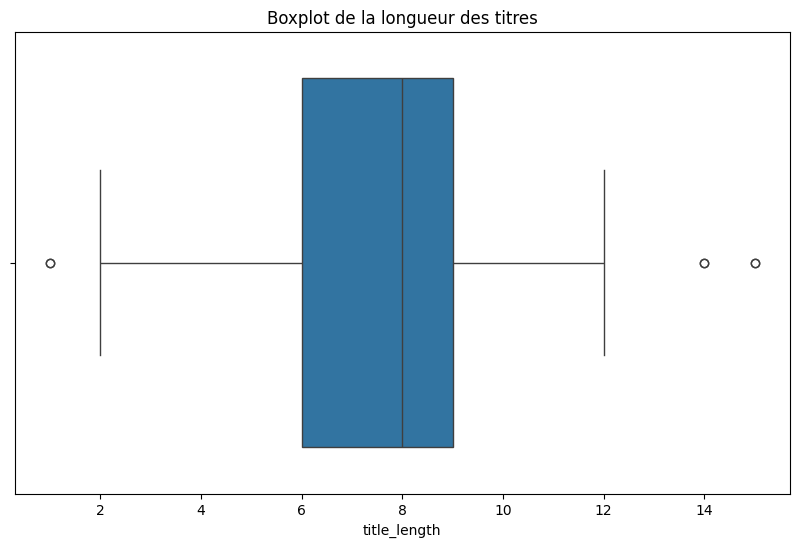

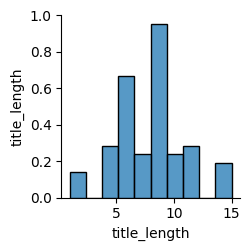

In [7]:
# Boxplot des longueurs de texte
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['title_length'])
plt.title("Boxplot de la longueur des titres")
plt.show()

# Pairplot pour examiner les relations entre les variables numériques
sns.pairplot(df[['title_length']])  # Ajouter d'autres variables numériques ici si nécessaire
plt.show()

## Boxplot des Longeurs (ANGLAIS)

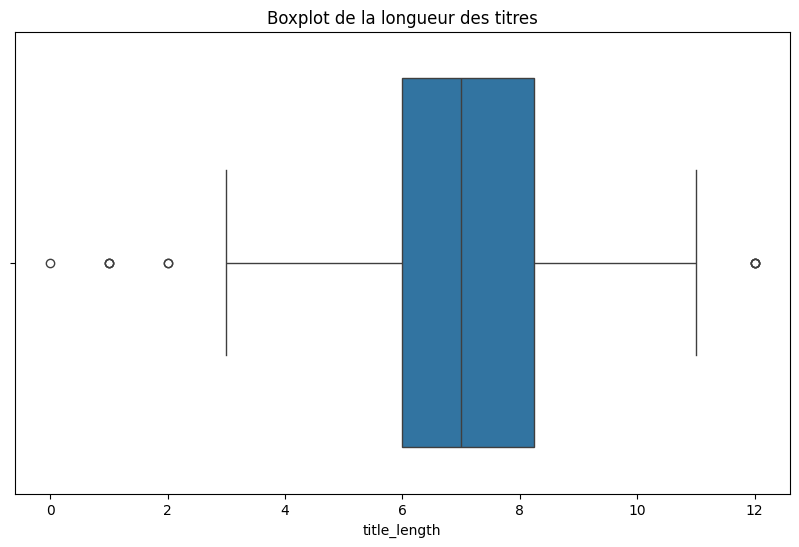

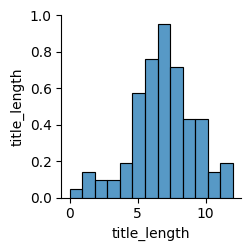

In [14]:
# Boxplot des longueurs de texte
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_en['title_length'])
plt.title("Boxplot de la longueur des titres")
plt.show()

# Pairplot pour examiner les relations entre les variables numériques
sns.pairplot(df_en[['title_length']])  # Ajouter d'autres variables numériques ici si nécessaire
plt.show()

## Boxplot des Longeurs (ARABIC)

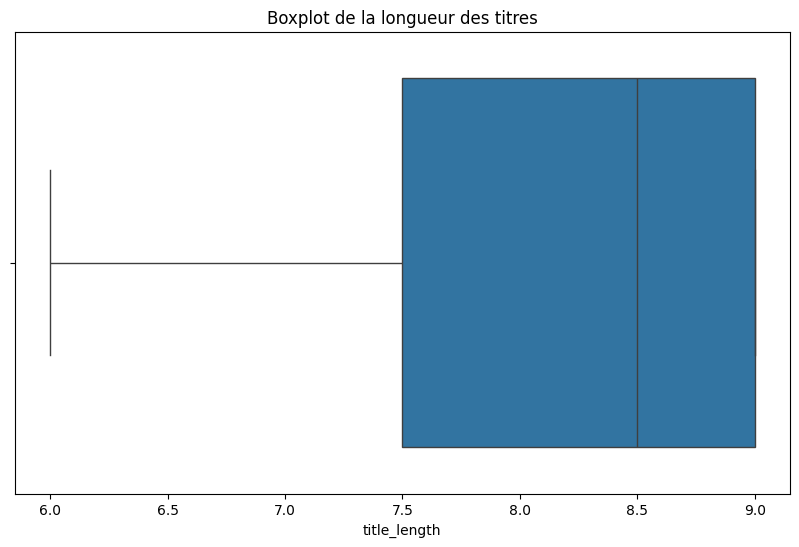

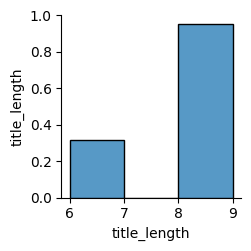

In [15]:
# Boxplot des longueurs de texte
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ar['title_length'])
plt.title("Boxplot de la longueur des titres")
plt.show()

# Pairplot pour examiner les relations entre les variables numériques
sns.pairplot(df_ar[['title_length']])  # Ajouter d'autres variables numériques ici si nécessaire
plt.show()

## Nuage des mots (FRENSH)

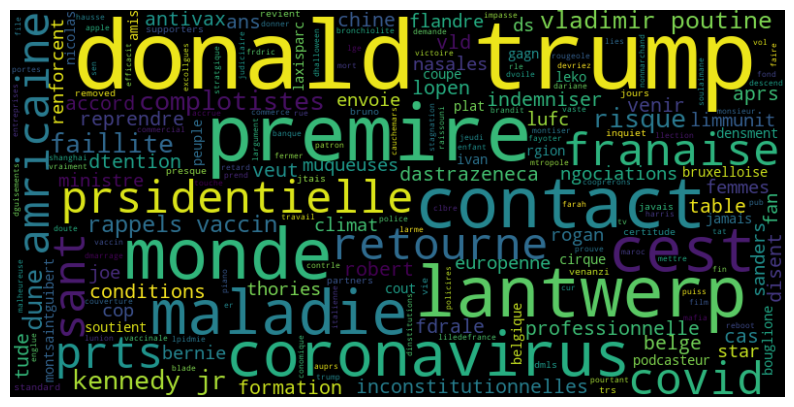

In [6]:
from wordcloud import WordCloud

# Générer le nuage de mots à partir des titres
wordcloud = WordCloud(stopwords='english', width=800, height=400).generate(' '.join(df['title']))

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Nuage des mots (ANGLAIS)

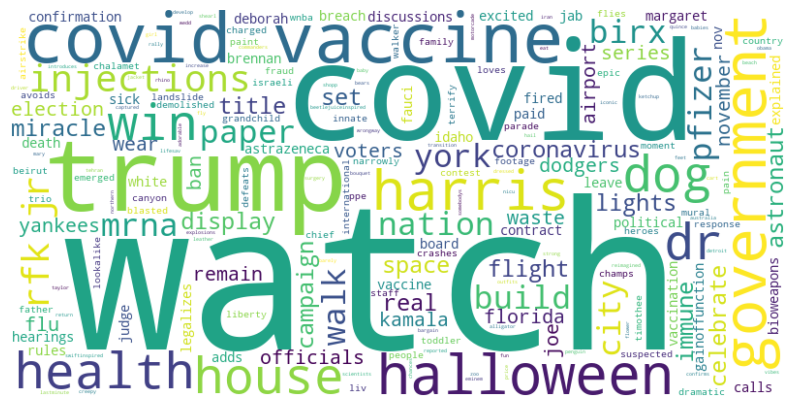

In [16]:
from wordcloud import WordCloud

# Générer le nuage de mots à partir des titres
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(df_en['title']))

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Nuage des mots (ARABIC)

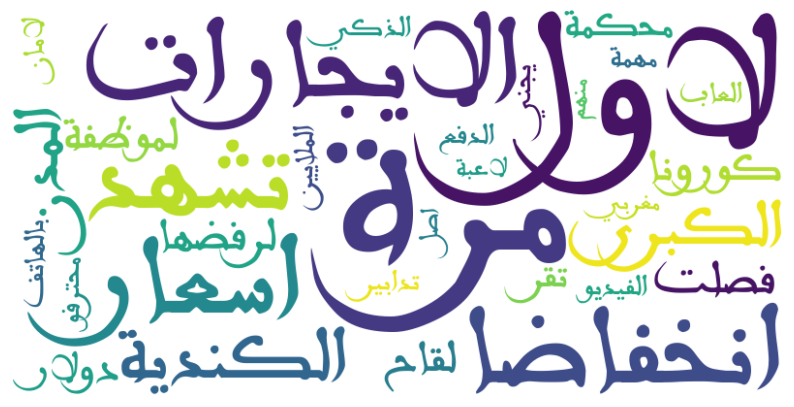

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Préparer les titres en arabe
titles_ar = ' '.join(df_ar['title'])

# Reshaper le texte arabe pour une ligature correcte
reshaped_text = arabic_reshaper.reshape(titles_ar)

# Inverser le texte pour l'affichage correct de droite à gauche
bidi_text = get_display(reshaped_text)

# Générer le nuage de mots
font_path = r"C:\Users\hp\AppData\Local\Microsoft\Windows\Fonts\maghribi-font 2.ttf"
wordcloud = WordCloud( background_color='white',width=800,height=400,font_path=font_path).generate(bidi_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
import spacy

# Charger le modèle en anglais de spaCy
nlp = spacy.load('en_core_web_sm')

# Appliquer le modèle de spaCy pour détecter les entités nommées
df['entities'] = df['title'].apply(lambda x: [ent.text for ent in nlp(x).ents])

# Exemple : Afficher les entités détectées
print(df[['title', 'entities']].head())


                                               title  \
0  dmarrage lpidmie bronchiolite mtropole liledef...   
1  coronavirus conditions indemniser maladie prof...   
2                  cest doute mort reboot film blade   
3  donald trump rle veut donner kennedy jr cas vi...   
4  retard er vol commercial dariane malheureuse l...   

                             entities  
0                                  []  
1                                  []  
2                                  []  
3  [donald trump rle, kennedy jr cas]  
4                                  []  
